In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('male-elephant-tusk-size.csv')
df #display df

,period,elephant_id,age,shoulder_height,tusk_length
0,1966-68,58,2.5,149.0,30.0
1,1966-68,78,2.5,151.0,27.0
2,1966-68,86,2.5,127.0,27.0
3,1966-68,293,2.5,156.0,32.0
4,1966-68,29,3.0,146.0,28.5
...,...,...,...,...,...
294,2005-13,78,7.5,220.0,84.7
295,2005-13,144,7.5,220.0,58.9
296,2005-13,1,9.0,220.0,99.0
297,2005-13,48,9.0,230.0,105.4


NOTE: The tusk length and shoulder height are both measured in centimetres

We'll split the data into two dataframes based on the time period so as to be able to compare 

In [5]:
pre_poaching = df.query('period == "1966-68"')
pre_poaching.head(3)

,period,elephant_id,age,shoulder_height,tusk_length
0,1966-68,58,2.5,149.0,30.0
1,1966-68,78,2.5,151.0,27.0
2,1966-68,86,2.5,127.0,27.0


In [6]:
post_recovery = df.query('period == "2005-13"')
post_recovery.head(3)

,period,elephant_id,age,shoulder_height,tusk_length
214,2005-13,52,4.5,195.0,47.0770
215,2005-13,14,5.0,200.0,48.2328
216,2005-13,42,5.0,180.0,54.0118


let's compare the average tusk length for both both periods

In [7]:
print("before:" , pre_poaching['tusk_length'].mean())
print("after:", post_recovery['tusk_length'].mean())

before: 67.44088785046729
after: 57.968809411764695


On average, tusk lengths appear to have decreased after the poaching period. These simple averages though don't account for the confounding factor of age. 

Younger elephants are generally smaller and have shorter tusks. If the average age of elephants in the 'after' period is younger, that can lead to skewness towards smaller tusks. We can address this by analysing the relationship between tusk length and overall body height

Text(220, 35, 'post_recovery')

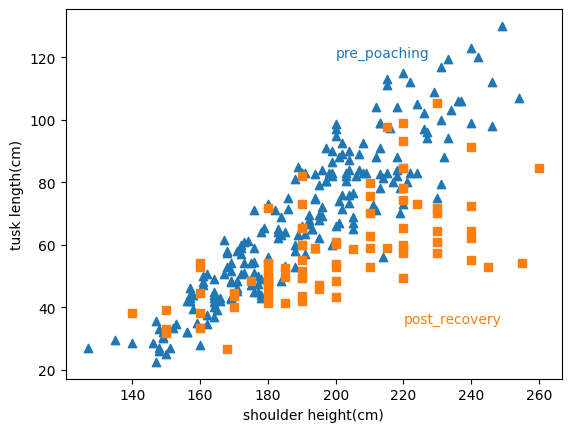

In [9]:
plt.scatter(pre_poaching['shoulder_height'], pre_poaching['tusk_length'], marker = '^')
plt.scatter(post_recovery['shoulder_height'], post_recovery['tusk_length'], marker = 's')
plt.xlabel('shoulder height(cm)')
plt.ylabel('tusk length(cm)')
plt.text(x=200, y=120, s='pre_poaching', color ='C0')
plt.text(x=220, y=35, s='post_recovery', color= 'C1')

According to the graph, it appears that for the same shoulder height, the pre-poachingelephants generally have longer tusks compared to the post-recovery elephants.

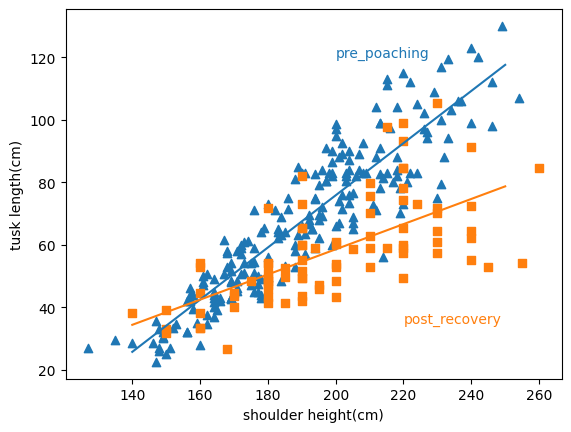

In [20]:
plt.scatter(pre_poaching['shoulder_height'], pre_poaching['tusk_length'], marker = '^')
plt.scatter(post_recovery['shoulder_height'], post_recovery['tusk_length'], marker = 's')
plt.xlabel('shoulder height(cm)')
plt.ylabel('tusk length(cm)')
plt.text(x=200, y=120, s='pre_poaching', color ='C0')
plt.text(x=220, y=35, s='post_recovery', color= 'C1')


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

class LinearModel:
    def _int_(self, model_name =""):
        self.model_name = model_name

    def fit(self, x, y):
        x = pd.DataFrame(x)
        linear_model = LinearRegression().fit(x, y)
        y_pred = linear_model.predict(x)
        self.slope = linear_model.coef_[0]
        self.intercept = linear_model.intercept_
        self.rsquared = r2_score(y, y_pred)

    def predict(self,x):
        return self.slope * x + self.intercept
    
    def plot_model(self, x_min, x_max, color = "black"):
        y_min = self.predict(x_min)
        y_max = self.predict(x_max)
        plt.plot([x_min, x_max], [y_min, y_max], color = color)

    def print_model_info(self):
        m = self.slope
        b = self.intercept
        rsquared = self.rsquared
        model_name = self.model_name
        print(f'LinearModel({model_name}):')
        print(f'parameters: slope = {m: .2f}, intercept = {b: .2f}')
        print(f'equation: y = {m: .2f}x + {b: .2f}')
        print(f'goodness of fit (R2): {rsquared: .3f}')

pre_model = LinearModel ()
pre_model.fit(x = pre_poaching['shoulder_height'], y = pre_poaching['tusk_length'])

post_model = LinearModel ()
post_model.fit(x = post_recovery['shoulder_height'], y = post_recovery['tusk_length'])

pre_model.plot_model(140, 250, 'C0')
post_model.plot_model(140, 250, 'C1')







Here we observe the slope prior to poaching is deeper. After the extreme poaching period, the slope becomes shallower.

The targeted poaching of elephants with the longest tusks seems to have reduced the tusk length for future generations.